# LDA Analysis, Case Study 2: Temperature

We will be exploring an LDA analysis of the "Big/Small Metal Blocks" question, which asks students to compare the explain their reasoning on why two blocks of different masses, when plunged into water for five seconds, would change temperature by a different amount. In particular, the question is: 

> *Imagine you have two room-temperature blocks made of the same metal, but one has more mass than the other. You drop the blocks into equal volumes of 5-degrees-C water, count to five, and then dump them out onto a table. You measure the temperature of both blocks, and the less massive one is colder than the more massive one. That’s because the mass of an object matters for how much its temperature changes.*
> 
> *What we want to know is why that makes sense or doesn’t make sense to you: Why is it that a less massive block changes its temperature more than a more massive block made of the same material and at the same starting temperature?*

## I. Imports

In [1]:
# Print out all expressions
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Wider Cells
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
# Ignore some warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning);

# General Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re as re
import pickle as pkl
import copy

import sys  
sys.path.insert(0, '..')
from scripts.lda_model import *

## II. Data Import and Restructuring

In [2]:
df = pd.read_csv('../data/heat_and_temperature.csv', names = ['num', 'ID', 'resp', 'drop'])
df.drop(columns = ['num', 'ID', 'drop'], inplace = True)
df.head(5)

,resp
0,A less massive block changes its temperature m...
1,The more massive block has more molecules movi...
2,There are fewer molecules that need to have th...
3,This makes sense to me because the more mass o...
4,Thermal energy is stored in the vibrations of ...


## III. LDA Modeling

The following code will take the data processed above and convert it into a usable format for the LDA model. Before we start modeling, though, we need to set some parameters for our particular data. 

In [3]:
bigrams =               text_to_bigrams(df)
corpus =                bigrams_to_corpus(bigrams)

Let's take a look at some plots of the words used in the collection of student responses. 

Total words: 2498, unique words: 358


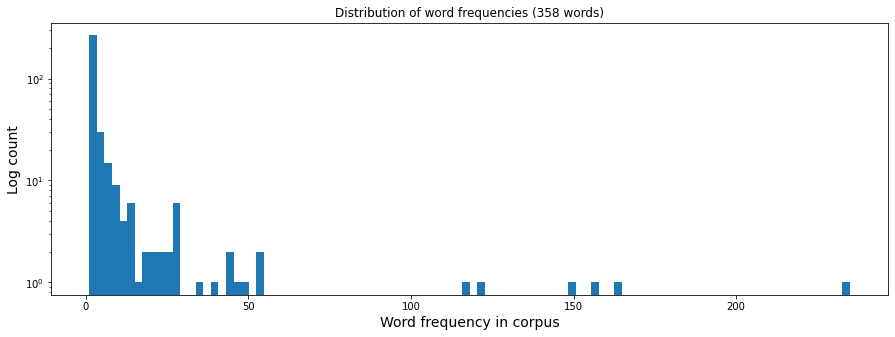

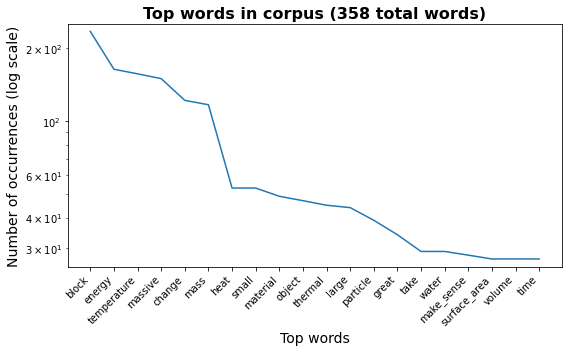

In [4]:
plot_words(corpus)

Let's now figure out the best thresholds for removing the most and least common words. A `no_above` threshold of 70% would remove words used in at least 70% of documents, and a `no_below` threshold of 3 would remove words used in only two or fewer documents. 

In [5]:
display_words_removed_at_thresholds(bigrams)


NO ABOVE THRESHOLDS


Dictionary with no_above=1 contains 358 unique words

Dictionary filtered with no_above=1.00 contains 358 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.90 contains 358 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.80 contains 358 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.70 contains 358 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.60 contains 357 unique words. 1 words removed:
 ['block'] 

Dictionary filtered with no_above=0.50 contains 354 unique words. 3 words removed:
 ['change', 'energy', 'temperature'] 

Dictionary filtered with no_above=0.40 contains 352 unique words. 2 words removed:
 ['mass', 'massive'] 

Dictionary filtered with no_above=0.30 contains 352 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.20 contains 349 unique words. 3 words removed:
 ['heat', 'material', 'small'] 

Dictionary filtered with no_above=0.10

You can now set the desired threshold values based on this particular data set. 

In [52]:
no_above = 0.4
no_below = 2

In [53]:
bow, id2word= create_bow(corpus, bigrams, no_above, no_below, 
                         display_removed_words = False)

We can now proceed with the actual modeling process. Here, you can set a number of topics desired for the model, as well as the number of responses to display for each topic. By default, the number of responses displayed is three, but that can be overridden by setting a value. 

In [60]:
num_topics = 5
num_responses_displayed = 5

In [61]:
model = LDA_model(bow, id2word, bigrams, 
                  num_topics = num_topics)
model.show_topics(num_words = 10, 
                  num_topics = num_topics)

Coherence of model with 5 topics: 0.3161429908269643




[(0,
  '0.105*"high" + 0.080*"molecule" + 0.063*"big" + 0.045*"easy" + 0.037*"slow" + 0.034*"mean" + 0.029*"low" + 0.028*"cool" + 0.027*"quicker" + 0.023*"matter"'),
 (1,
  '0.052*"surface_area" + 0.050*"heat" + 0.047*"small" + 0.034*"volume" + 0.031*"water" + 0.031*"particle" + 0.029*"thermal" + 0.026*"large" + 0.024*"unit" + 0.024*"few"'),
 (2,
  '0.117*"object" + 0.066*"heat" + 0.050*"atom" + 0.048*"require" + 0.047*"specific_heat" + 0.039*"capacity" + 0.039*"heat_capacity" + 0.036*"sense" + 0.035*"mean" + 0.033*"material"'),
 (3,
  '0.087*"particle" + 0.069*"material" + 0.060*"small" + 0.039*"make_sense" + 0.038*"object" + 0.038*"faster" + 0.038*"great" + 0.033*"average" + 0.031*"thermal" + 0.024*"need"'),
 (4,
  '0.089*"large" + 0.066*"thermal" + 0.063*"take" + 0.048*"time" + 0.047*"great" + 0.043*"water" + 0.040*"small" + 0.032*"volume" + 0.031*"heat" + 0.030*"atom"')]

In [62]:
display_n_responses(df, num_responses_displayed, model, corpus, bow)

Topic 0: 0.105*"high" + 0.080*"molecule" + 0.063*"big" + 0.045*"easy" + 0.037*"slow" + 0.034*"mean" + 0.029*"low" + 0.028*"cool" + 0.027*"quicker" + 0.023*"matter"


,resp,0,1,2,3,4
54,"A more massive block has more mass of that higher temperature, which means it will take longer for it to cool down; there is more matter to cool. The less massive block has less matter at that higher temperature, so it cools quicker.",0.973032,0.000000,0.000000,0.000000,0.000000
31,"More mass means that there is more material to ""convert"" to lower temperature, so it will take more time for the temperature of the higher mass block to lower compared to the lower mass block.",0.970135,0.000000,0.000000,0.000000,0.000000
26,"Though the temperature of each block is the same, the TOTAL energy in the more massive block is higher, since there's more mass to be kept at a given temperature. Energy leaves each block at the same rate, so the block with more energy to begin with has more energy at the end.",0.961965,0.000000,0.010118,0.000000,0.000000
97,"The more massive block likely did not reach as high of a temperature as the less massive block in the first place. The amount of energy it takes to raise the temperature of a more massive block is higher. As a result, when we take it out, we observe less of a change in temperature.",0.961965,0.000000,0.010119,0.000000,0.000000
42,A more massive block changes its temperature slower because there's more material for the surrounding fluid to change its temperature.,0.935492,0.016537,0.017161,0.015043,0.015766





Topic 1: 0.052*"surface_area" + 0.050*"heat" + 0.047*"small" + 0.034*"volume" + 0.031*"water" + 0.031*"particle" + 0.029*"thermal" + 0.026*"large" + 0.024*"unit" + 0.024*"few"


,resp,0,1,2,3,4
4,"Thermal energy is stored in the vibrations of the particles making up a solid. The amount of thermal energy stored per unit mass of a solid at a given temperature varies based on the material, but the thermal energy per unit mass is always proportional to the temperature. Therefore, if the same amount of thermal energy leaves each block of metal in the 5 second period, this will result in a greater loss of thermal energy per unit mass in the lower mass block than the higher mass block, and therefore a greater drop in temperature. (In actuality, the lower mass block will probably lose less energy because it probably has a lower surface area. However, total energy loss is proportional to surface area, and so due to the square cube law the mass of the block will decrease faster proportionally than the surface area, resulting in more energy lost per unit mass even if the smaller surface area is taken into account.)",0.0,0.994837,0.0,0.0,0.0
127,"A less massive block has fewer units of matter for which thermal energy can be distributed. As such, because both are the same material, the rate of energy transfer is going to be roughly the same.The less massive block, however, with its fewer units of matter, has fewer units of heat energy, and so a loss of the same amount of energy (roughly) results in a greater decrease in temperature for the less massive block.",0.0,0.987617,0.0,0.0,0.0
55,"This idea does make sense to me, although I'm not sure I have the proper reasoning for it. Based off the definition of temperature, in terms of measuring the KE of the particles, a more massive block has more particles that need to cool down in order for the average KE of the particles to be lower. This is why a block with less mass can cool down faster.",0.0,0.987617,0.0,0.0,0.0
21,"A less massive block has a faster rate of temperature change because there is an equal amount of total kinetic energy for the particles in both blocks, but in the less massive block, there are fewer particles, so each particle has more energy compared to a particle in the more massive block. More energy means that in collisions with the water molecules, more energy is transferred at a faster rate.",0.0,0.986941,0.0,0.0,0.0
149,"A more massive bock of the same material will have a greater surface area. This will allow more of the water particles to interact with the surface and the metal will transfer heat to the water. Likewise, the larger cube will be submerged deeper in the water and thus have more of the water to lose its heat to",0.0,0.986941,0.0,0.0,0.0





Topic 2: 0.117*"object" + 0.066*"heat" + 0.050*"atom" + 0.048*"require" + 0.047*"specific_heat" + 0.039*"capacity" + 0.039*"heat_capacity" + 0.036*"sense" + 0.035*"mean" + 0.033*"material"


,resp,0,1,2,3,4
23,"It make sense because the more massive block has more mass, more atoms, so the block with more atoms has more energy than the block with less atoms if all their atoms have the same energy each. The only thing it doesn't state though is the shape of the objects and if their surface areas are proportional for conducting heat.",0.0,0.0,0.980795,0.0,0.0
84,This does not entirely make sense to me. The only possible explanation I could imagine is that is involves the way heat or thermal energy interacts with objects and that an object with more mass means that more things must interact with that heat thus making it slower to cool.,0.0,0.0,0.980795,0.0,0.0
102,A less massive block changes its temperature more because it has a lower heat capacity (which is an extensive property). Lower heat capacity from smaller mass means it takes less energy to increase temperature.,0.0,0.0,0.977069,0.0,0.0
57,"Normally, I relate it to specific heat. But if I were to guess at the underlying cause, then I would assume that for more massive blocks, the collisions between materials transfers less kinetic energy than for less massive blocks. Either that, or there are less collisions overall.",0.0,0.0,0.974606,0.0,0.0
181,"Because temperature is a measure of how much the atoms in an object are moving. More mass = more atoms, which means that it will take longer for all the atoms to cool/move slower.",0.0,0.0,0.971551,0.0,0.0





Topic 3: 0.087*"particle" + 0.069*"material" + 0.060*"small" + 0.039*"make_sense" + 0.038*"object" + 0.038*"faster" + 0.038*"great" + 0.033*"average" + 0.031*"thermal" + 0.024*"need"


,resp,0,1,2,3,4
48,"same material, meaning it has the same properties, yet one with the more mass need more time to have its temp decreased as the other one.Delta Q = m c delta T --> same delta Q, same c but larger m --> smaller delta T",0.0,0.0,0.0,0.981552,0.0
35,"The less massive block would change more, and faster than the more massive one because there is less material, less mass that it is working to change. The system is trying to reach equilibrium, so a smaller object will be affected more in terms of temperature than a larger object.",0.0,0.0,0.0,0.978290,0.0
12,"This makes sense to me because it seems like the same amount of energy would be transferred to both blocks, but the energy per particle or per mass would be less in the more massive block because the same energy is spread out more. Temperature is related to entropy which is related to the number of particles.",0.0,0.0,0.0,0.976184,0.0
187,if temperature is a measurement of the average energy of particles in an object then in order to change the average of an object with more particles it will take more energy to change the average temperature because you will have to change the energy of more particles,0.0,0.0,0.0,0.973626,0.0
143,It has more material that needs to change temperature. This makes it more resistant to external temperatures. A smaller amount of material is more impacted by temperature changes than a larger amount of material.,0.0,0.0,0.0,0.973626,0.0





Topic 4: 0.089*"large" + 0.066*"thermal" + 0.063*"take" + 0.048*"time" + 0.047*"great" + 0.043*"water" + 0.040*"small" + 0.032*"volume" + 0.031*"heat" + 0.030*"atom"


,resp,0,1,2,3,4
110,"It makes sense to me that a less massive block would change temperature more rapidly because the smaller block at the same temperature stores less energy than the larger block of the same temperature but both blocks transfer thermal energy to their surroundings at similar rates, so the smaller block with less thermal energy to begin with will loose a larger percentage of its thermal energy",0.0,0.0,0.0,0.0,0.985995
67,"If left in the water for a long enough time, the blocks would reach the same temperature, but because they were only submerged in the cold water for 5 seconds, the less massive block came out colder than the more massive block. This is because it takes more energy to change the temperature of a more massive block. It is similar to how it takes longer for a large pot of water to boil than a small pot.",0.0,0.0,0.0,0.0,0.984166
111,"If the two blocks are of the same material, they must be of the same density. If one is more massive this requires that it be larger in volume. Since the block is placed in a colder environment, its energy will be ""taken"" slowly. The larger block loses less energy in the same time because of its larger volume.",0.0,0.0,0.0,0.0,0.983059
98,"The total thermal energy of the more massive block is larger since it contains more material that has a certain temperature. Since water can only transfer so much entropy in a certain amount of time, the larger changes its temperature less in the same amount of time.",0.0,0.0,0.0,0.0,0.981786
49,"It makes sense because the larger mass has more are for the temperature to reside in so when there's a change, it will take longer for it to change since the larger mass takes more room. Just like how microwaving food takes longer for food with more mass.",0.0,0.0,0.0,0.0,0.976487


Potential Ideas from LDA: 

0. More matter/mass ---> more energy, more resistant to change (thermal inertia?)
1. Something about the kinetic energy of the particles
2. Higher heat capacity / specific heat means longer time to cool down
3. Energy is "spread out" across more material in the larger block
4. Temperature is "stored" in mass or volume